# Sales Analysis
### Data source - https://www.kaggle.com/kyanyoga/sample-sales-data 

### Import necessary libraries

In [281]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Import sales csv file

In [98]:
sales_data = pd.read_csv('./Dataset/sales_data_kaggle.csv', encoding='"ISO-8859-1"')
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121.0,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134.0,41.0,94.74,2.0,3884.34,7/1/2003 0:00,Shipped,3.0,7.0,2003.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145.0,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,8.0,2003.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159.0,49.0,100.00,14.0,5205.27,10/10/2003 0:00,Shipped,4.0,10.0,2003.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### Preview data 

In [23]:
sales_data.shape

(2824, 25)

In [24]:
sales_data.keys()

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [28]:
sales_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


## Clean up the data

### 1) Check for NAN values in data

#### Check for NAN values in entire data frame

In [100]:
sales_data.isnull().values.any()

True

#### Count of NAN values in entire data frame

In [101]:
sales_data.isnull().sum().sum()

5282

#### check for all rows with NAN data

In [102]:
nan_df = sales_data[sales_data.isna().all(axis=1)]
nan_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check for column data NAN 

In [103]:
sales_data['ADDRESSLINE1'].isnull().values.any()

True

#### Count of NAN values in specific column

In [104]:
sales_data['ADDRESSLINE1'].isnull().sum()

5

#### Get percentage of the null count

In [105]:
sales_data[sales_data.columns[sales_data.isnull().any()]].isnull().sum() * 100 / sales_data.shape[0]

ORDERNUMBER          0.176803
QUANTITYORDERED      0.176803
PRICEEACH            0.176803
ORDERLINENUMBER      0.176803
SALES                0.176803
ORDERDATE            0.176803
STATUS               0.176803
QTR_ID               0.176803
MONTH_ID             0.176803
YEAR_ID              0.176803
PRODUCTLINE          0.176803
MSRP                 0.176803
PRODUCTCODE          0.176803
CUSTOMERNAME         0.176803
PHONE                0.176803
ADDRESSLINE1         0.176803
ADDRESSLINE2        89.321075
CITY                 0.176803
STATE               52.722772
POSTALCODE           2.864215
COUNTRY              0.176803
TERRITORY           38.154173
CONTACTLASTNAME      0.176803
CONTACTFIRSTNAME     0.176803
DEALSIZE             0.176803
dtype: float64

#### Drop all Nan rows

In [106]:
sales_data = sales_data.dropna(how='all')
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121.0,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134.0,41.0,94.74,2.0,3884.34,7/1/2003 0:00,Shipped,3.0,7.0,2003.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145.0,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,8.0,2003.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159.0,49.0,100.00,14.0,5205.27,10/10/2003 0:00,Shipped,4.0,10.0,2003.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [107]:
# Check for NAN values still exists 
sales_data.isnull().values.any()

True

#### Drop ADDRESSLINE2 column as it has more NAN values and looks it is not useful

In [108]:
sales_data = sales_data.drop('ADDRESSLINE2', 1) # where 1 is the axis number (0 for rows and 1 for columns)

In [112]:
sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [161]:
# Check for percentage of NAN
sales_data[sales_data.columns[sales_data.isnull().any()]].isnull().sum() * 100 / sales_data.shape[0]

STATE         48.459086
POSTALCODE     2.692171
TERRITORY     38.044633
dtype: float64

In [117]:
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121.0,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134.0,41.0,94.74,2.0,3884.34,7/1/2003 0:00,Shipped,3.0,7.0,2003.0,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145.0,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,8.0,2003.0,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159.0,49.0,100.00,14.0,5205.27,10/10/2003 0:00,Shipped,4.0,10.0,2003.0,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [165]:
sales_data['CITY'].count()

2823

### Fill missing values
#### Find same country states and fill that state to NAN

In [163]:
g = sales_data.dropna(subset=['STATE']).drop_duplicates('COUNTRY').set_index('COUNTRY')['STATE']
sales_data['STATE'] = sales_data['STATE'].fillna(sales_data['COUNTRY'].map(g))

In [171]:
# Check for percentage of NAN
sales_data[sales_data.columns[sales_data.isnull().any()]].isnull().sum() * 100 / sales_data.shape[0]

STATE         48.459086
POSTALCODE     2.692171
TERRITORY     38.044633
dtype: float64

#### Based on country update zip for NAN  

In [172]:
gg = sales_data.dropna(subset=['POSTALCODE']).drop_duplicates('COUNTRY').set_index('COUNTRY')['POSTALCODE']
sales_data['POSTALCODE'] = sales_data['POSTALCODE'].fillna(sales_data['COUNTRY'].map(gg))

In [173]:
# Check for percentage of NAN
sales_data[sales_data.columns[sales_data.isnull().any()]].isnull().sum() * 100 / sales_data.shape[0]

STATE        48.459086
TERRITORY    38.044633
dtype: float64

### 2) Correct columns data type

In [174]:
# Convert ORDERDATE from str to datetime object
print(type(sales_data['ORDERDATE'][0]))
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'])
print(type(sales_data['ORDERDATE'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [175]:
sales_data['QUANTITYORDERED'] = pd.to_numeric(sales_data['QUANTITYORDERED'])
sales_data['QUANTITYORDERED'] = pd.to_numeric(sales_data['QUANTITYORDERED'])
sales_data['SALES'] = pd.to_numeric(sales_data['SALES'])

## Augment data with additional columns
#### Add TOTALSALES column

In [254]:
sales_data['TOTALSALES'] = sales_data['QUANTITYORDERED'] * sales_data['PRICEEACH']
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,TOTALSALES
0,10107.0,30.0,95.70,2.0,2871.00,2003-02-24,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2871.00
1,10121.0,34.0,81.35,5.0,2765.90,2003-05-07,Shipped,2.0,5.0,2003.0,...,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2765.90
2,10134.0,41.0,94.74,2.0,3884.34,2003-07-01,Shipped,3.0,7.0,2003.0,...,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34
3,10145.0,45.0,83.26,6.0,3746.70,2003-08-25,Shipped,3.0,8.0,2003.0,...,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,3746.70
4,10159.0,49.0,100.00,14.0,5205.27,2003-10-10,Shipped,4.0,10.0,2003.0,...,7734 Strong St.,San Francisco,CA,10022,USA,NaN,Brown,Julie,Medium,4900.00


In [257]:
sales_data.keys()

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'TOTALSALES'],
      dtype='object')

## Data Exploration

### Question 1. What was the best month for sales? How much was earned that month?

In [193]:
monthly_sales_data = sales_data.groupby(['MONTH_ID']).sum()
monthly_sales_data 

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,YEAR_ID,MSRP,TOTALSALES
MONTH_ID,,,,,,,,,
1.0,2349698.0,7997.0,19111.78,1510.0,785874.44,229.0,458976.0,23081.0,659582.29
2.0,2300254.0,7903.0,18902.49,1435.0,810441.90,224.0,448952.0,22680.0,668328.15
3.0,2179852.0,7585.0,17432.61,1355.0,754501.39,212.0,424904.0,20883.0,626186.73
4.0,1824713.0,6704.0,14763.28,965.0,669390.96,356.0,356710.0,17378.0,560334.46
5.0,2595661.0,8992.0,21137.41,1555.0,923972.56,504.0,505070.0,25658.0,756812.91
6.0,1337996.0,4620.0,10873.51,763.0,454756.78,262.0,262478.0,13001.0,384743.59
7.0,1441499.0,4899.0,12105.77,905.0,514875.97,423.0,282514.0,14686.0,420973.34
8.0,1955772.0,6538.0,15974.11,1426.0,659310.57,573.0,382706.0,19256.0,552132.91
9.0,1749237.0,5681.0,14277.88,1026.0,584724.27,513.0,342608.0,17245.0,474900.12


In [203]:
monthly_sales_data.index.values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

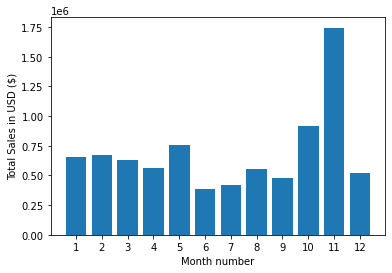

In [217]:
months = monthly_sales_data.index.values
plt.bar(months, monthly_sales_data['TOTALSALES'])
plt.xticks(months)
plt.ylabel('Total Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Answer 1.  Best month for sales - November and earned total of $1744682.45 

### Question 2. What city sold the most product?

In [219]:
city_sales_data = sales_data.groupby(['CITY']).sum()
city_sales_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,TOTALSALES
CITY,,,,,,,,,,
Aaarhus,276642.0,882.0,2378.21,198.0,100595.55,108.0,270.0,54096.0,2995.0,77478.79
Allentown,319272.0,1111.0,2662.14,174.0,122138.14,100.0,263.0,62126.0,3304.0,96378.27
Barcelona,235596.0,882.0,1919.63,142.0,78411.86,90.0,246.0,46077.0,2003.0,73927.00
Bergamo,489268.0,1650.0,3752.69,412.0,137955.72,138.0,366.0,96158.0,4116.0,127143.64
Bergen,295737.0,973.0,2556.66,199.0,111640.28,112.0,311.0,58091.0,3183.0,86339.11
...,...,...,...,...,...,...,...,...,...,...
Toulouse,204529.0,687.0,1701.95,99.0,70488.44,62.0,168.0,40070.0,1943.0,58885.28
Tsawassen,266782.0,873.0,2165.00,183.0,74634.85,66.0,160.0,52104.0,2242.0,71492.33
Vancouver,225709.0,703.0,1895.80,132.0,75238.92,88.0,242.0,44077.0,2341.0,60597.91


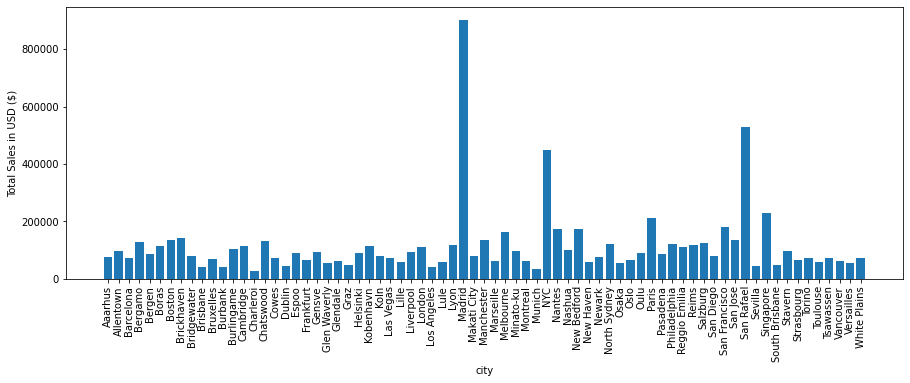

In [252]:
# Get ordered keys as to match city_sales_data
cities = [city for city, df in sales_data.groupby(['CITY'])]

plt.bar(cities, city_sales_data['TOTALSALES'],align='center')
plt.ylabel('Total Sales in USD ($)')
plt.xlabel('city')
plt.xticks(cities, rotation='vertical', size=10)
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

### Get max city sales

In [253]:
city_sales_data[city_sales_data['TOTALSALES'] == city_sales_data['TOTALSALES'].max()]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,TOTALSALES
CITY,,,,,,,,,,
Madrid,3125051.0,10958.0,24967.85,1950.0,1082551.44,709.0,1890.0,609217.0,29801.0,902094.19


### Answer 2. 'Madrid' city sold most products with total sales with $902094.19

### Question 3.  What products are most often sold together?

In [271]:
order_no_sales_data = sales_data[sales_data['ORDERNUMBER'].duplicated(keep=False)]
# Group the ordernumber and productline with comma sperated
order_no_sales_data['GROUPED'] = order_no_sales_data.groupby('ORDERNUMBER')['PRODUCTLINE'].transform(lambda x: ','.join(x))
# Drop duplicates 
dd_ordered_sales_data = order_no_sales_data[['ORDERNUMBER', 'GROUPED']].drop_duplicates()
dd_ordered_sales_data

F:\Environments\ds_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ORDERNUMBER,GROUPED
0,10107.0,"Motorcycles,Motorcycles,Motorcycles,Motorcycle..."
1,10121.0,"Motorcycles,Motorcycles,Motorcycles,Motorcycle..."
2,10134.0,"Motorcycles,Motorcycles,Motorcycles,Motorcycle..."
3,10145.0,"Motorcycles,Motorcycles,Motorcycles,Motorcycle..."
4,10159.0,"Motorcycles,Motorcycles,Motorcycles,Classic Ca..."
...,...,...
1971,10385.0,"Vintage Cars,Ships"
2361,10156.0,"Vintage Cars,Planes"
2363,10199.0,"Vintage Cars,Planes,Planes"
2537,10397.0,"Ships,Ships,Ships,Ships,Ships"


### Count unique pairs of number

In [273]:
count = Counter()

for row in dd_ordered_sales_data['GROUPED']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('Classic Cars', 'Classic Cars') 3305
('Vintage Cars', 'Vintage Cars') 1494
('Planes', 'Planes') 961
('Motorcycles', 'Motorcycles') 916
('Classic Cars', 'Trucks and Buses') 760
('Trucks and Buses', 'Trucks and Buses') 671
('Vintage Cars', 'Classic Cars') 631
('Classic Cars', 'Vintage Cars') 616
('Vintage Cars', 'Ships') 560
('Classic Cars', 'Motorcycles') 550


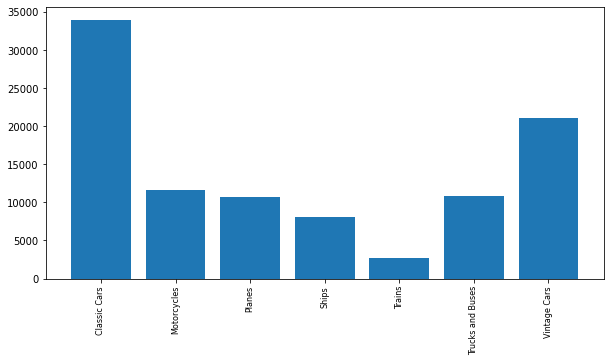

In [277]:
product_group = sales_data.groupby('PRODUCTLINE')
quantity_ordered = product_group.sum()['QUANTITYORDERED']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.rcParams["figure.figsize"] = (6,5)
plt.show()

### Compare product with prices

F:\Environments\ds_env\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
F:\Environments\ds_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


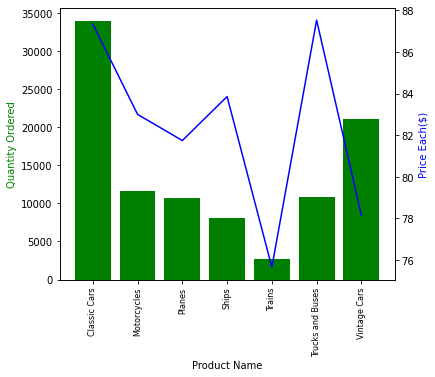

In [284]:
prices = sales_data.groupby('PRODUCTLINE').mean()['PRICEEACH']

fig, ax1 = plt.subplots()
keys = [pair for pair, df in product_group]

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()